MAIN PACKAGES AND LIBRAIRIES


In [1]:

# To install

%pip install kagglehub


# To import 

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Path to dataset files: C:\Users\sansa\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1


STEP 1 - ANALYSIS

test columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 TRAIN: 1,296,675 rows × 22 columns
 TEST: 555,719 rows × 22 columns

 Columns:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

2. DATA QUALITY

 Missing values - TRAIN: 0, 

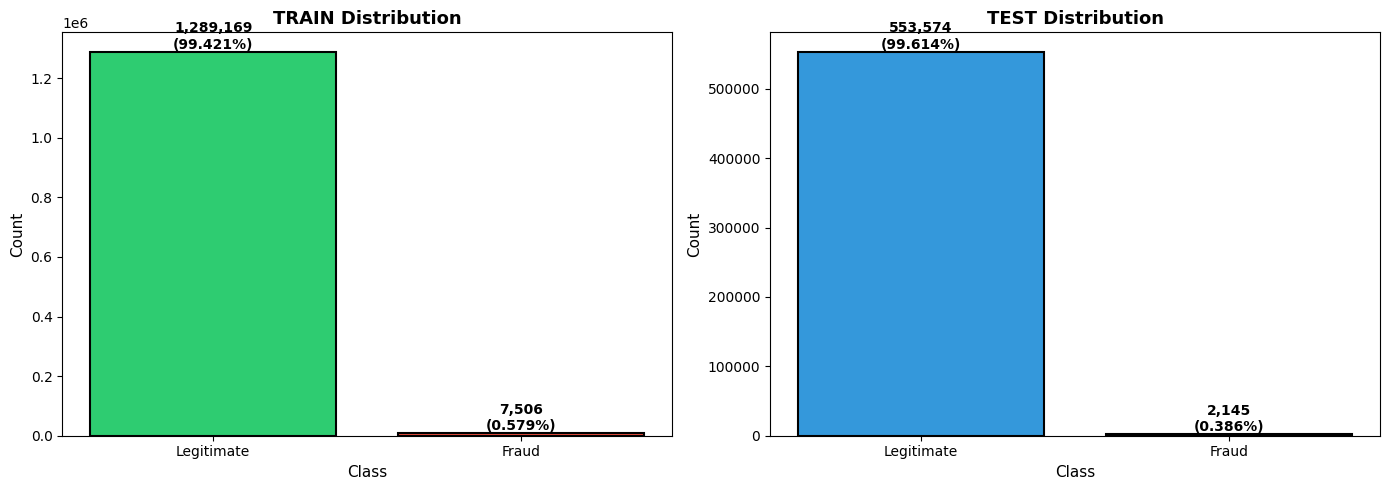


4. KEY FEATURES

 Feature types:
   Numeric: 9
   Categorical: 12

 Amount (amt) statistics:
   Mean: $70.35
   Median: $47.52
   Std: $160.32
   Range: $1.00 - $28948.90

   By class:
   Legitimate: $67.67
   Fraud: $531.32

 Time period:
   From: 2019-01-01 00:00:18
   To: 2020-06-21 12:13:37
   Duration: 537 days

5. DESCRIPTIVE STATISTICS

 Numeric features summary:
                    mean           std           min           max
cc_num      4.171920e+17  1.308806e+18  6.041621e+10  4.992346e+18
amt         7.035104e+01  1.603160e+02  1.000000e+00  2.894890e+04
zip         4.880067e+04  2.689322e+04  1.257000e+03  9.978300e+04
lat         3.853762e+01  5.075808e+00  2.002710e+01  6.669330e+01
long       -9.022634e+01  1.375908e+01 -1.656723e+02 -6.795030e+01
city_pop    8.882444e+04  3.019564e+05  2.300000e+01  2.906700e+06
unix_time   1.349244e+09  1.284128e+07  1.325376e+09  1.371817e+09
merch_lat   3.853734e+01  5.109788e+00  1.902779e+01  6.751027e+01
merch_long -9.022646e+0

In [2]:
# Load the dataset

df_train = pd.read_csv(f"{path}\\fraudTrain.csv")
df_test = pd.read_csv(f"{path}\\fraudTest.csv")

# First analysis

print("test columns : \n \n",df_test.columns)
print("\n \n train columns : \n \n",df_train.columns)

# Remove unnecessary index
if 'Unnamed: 0' in df_train.columns:
    df_train = df_train.drop('Unnamed: 0', axis=1)
    df_test = df_test.drop('Unnamed: 0', axis=1)

print(f"\n TRAIN: {df_train.shape[0]:,} rows × {df_train.shape[1]} columns")
print(f" TEST: {df_test.shape[0]:,} rows × {df_test.shape[1]} columns")
print(f"\n Columns:\n{list(df_train.columns)}")

df = df_train.copy()

# ============================================================================
# 2. DATA QUALITY
# ============================================================================

print("\n" + "="*80)
print("2. DATA QUALITY")
print("="*80)

# Missing values
missing_train = df_train.isnull().sum().sum()
missing_test = df_test.isnull().sum().sum()
print(f"\n Missing values - TRAIN: {missing_train}, TEST: {missing_test}")

# Duplicates
dup_train = df_train.duplicated().sum()
dup_test = df_test.duplicated().sum()
print(f" Duplicates - TRAIN: {dup_train}, TEST: {dup_test}")

# Data types
print(f"\n Data types:")
print(df.dtypes.value_counts())

# ============================================================================
# 3. CLASS IMBALANCE (CRITICAL)
# ============================================================================

print("\n" + "="*80)
print("3. CLASS IMBALANCE - TARGET 'is_fraud'")
print("="*80)

target_col = 'is_fraud'

# TRAIN distribution
class_dist_train = df_train[target_col].value_counts().sort_index()
class_pct_train = (df_train[target_col].value_counts(normalize=True).sort_index() * 100)
imbalance_ratio_train = class_dist_train[0] / class_dist_train[1]

print(f"\n TRAIN:")
print(f"   Legitimate (0): {class_dist_train[0]:,} ({class_pct_train[0]:.3f}%)")
print(f"   Fraud (1): {class_dist_train[1]:,} ({class_pct_train[1]:.3f}%)")
print(f"   Imbalance ratio: {imbalance_ratio_train:.0f}:1")

# TEST distribution
class_dist_test = df_test[target_col].value_counts().sort_index()
class_pct_test = (df_test[target_col].value_counts(normalize=True).sort_index() * 100)
imbalance_ratio_test = class_dist_test[0] / class_dist_test[1]

print(f"\n TEST:")
print(f"   Legitimate (0): {class_dist_test[0]:,} ({class_pct_test[0]:.3f}%)")
print(f"   Fraud (1): {class_dist_test[1]:,} ({class_pct_test[1]:.3f}%)")
print(f"   Imbalance ratio: {imbalance_ratio_test:.0f}:1")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar([0, 1], class_dist_train.values, color=['#2ecc71', '#e74c3c'], 
           edgecolor='black', linewidth=1.5)
axes[0].set_title('TRAIN Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legitimate', 'Fraud'])
for i, v in enumerate(class_dist_train.values):
    axes[0].text(i, v, f'{v:,}\n({class_pct_train.values[i]:.3f}%)', 
               ha='center', va='bottom', fontweight='bold')

axes[1].bar([0, 1], class_dist_test.values, color=['#3498db', '#e67e22'], 
           edgecolor='black', linewidth=1.5)
axes[1].set_title('TEST Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legitimate', 'Fraud'])
for i, v in enumerate(class_dist_test.values):
    axes[1].text(i, v, f'{v:,}\n({class_pct_test.values[i]:.3f}%)', 
               ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. KEY FEATURES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("4. KEY FEATURES")
print("="*80)

# Identify feature types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Feature types:")
print(f"   Numeric: {len(numeric_cols)}")
print(f"   Categorical: {len(categorical_cols)}")

# Amount analysis
print(f"\n Amount (amt) statistics:")
print(f"   Mean: ${df['amt'].mean():.2f}")
print(f"   Median: ${df['amt'].median():.2f}")
print(f"   Std: ${df['amt'].std():.2f}")
print(f"   Range: ${df['amt'].min():.2f} - ${df['amt'].max():.2f}")

print(f"\n   By class:")
for cls in [0, 1]:
    label = "Legitimate" if cls == 0 else "Fraud"
    mean_amt = df[df[target_col] == cls]['amt'].mean()
    print(f"   {label}: ${mean_amt:.2f}")

# Temporal feature
df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])
print(f"\n Time period:")
print(f"   From: {df['trans_datetime'].min()}")
print(f"   To: {df['trans_datetime'].max()}")
print(f"   Duration: {(df['trans_datetime'].max() - df['trans_datetime'].min()).days} days")


# ============================================================================
# 5. BASIC STATISTICS
# ============================================================================

print("\n" + "="*80)
print("5. DESCRIPTIVE STATISTICS")
print("="*80)

print("\n Numeric features summary:")
print(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']])

# ============================================================================
# 6. KEY INSIGHTS & NEXT STEPS
# ============================================================================

print("\n" + "="*80)
print("6. KEY INSIGHTS & NEXT STEPS")
print("="*80)

print("\n KEY FINDINGS:")
print(f"   1. Severe class imbalance: ~{imbalance_ratio_train:.0f}:1 ratio")
print(f"   2. {len(numeric_cols)} numeric features, {len(categorical_cols)} categorical")
print(f"   3. High cardinality in merchant, job → Need encoding strategy")
print(f"   4. Temporal data available for feature engineering")
print(f"   5. No missing values (excellent data quality)")

print("\n PREPROCESSING ROADMAP:")
print("   1. Drop PII: cc_num, first, last, street, trans_num")
print("   2. Temporal features: extract hour, day, day_of_week from trans_date_trans_time")
print("   3. Encode categoricals:")
print("      • Low cardinality (gender, state): One-Hot or Label Encoding")
print("      • High cardinality (category, merchant, job): Target Encoding")
print("   4. Scale numeric features: amt, lat, long, city_pop")
print("   5. Feature engineering: customer-merchant distance, age from dob")
print("   6. Handle imbalance: SMOTE, class_weight, or undersampling")

print("\n MODELING STRATEGY:")
print("   • Validation: StratifiedKFold (5-fold)")
print("   • Metrics: F1-Score (primary), PR-AUC, ROC-AUC")
print("   • Models: Random Forest, Gradient Boosting, XGBoost")
print("   • Optimize threshold based on business cost (FP vs FN)")

print("\n" + "="*80)
print(" EXPLORATION COMPLETED - Ready for preprocessing!")
print("="*80)


2 - PREPROCESSING


In [3]:
# Drop columns we don't need 

col_to_drop = ['cc_num','trans_num','first','last','street']

df_train = df_train.drop(columns=col_to_drop)
df_test = df_test.drop(columns=col_to_drop)

print(f" Dropped {len(col_to_drop)} columns")
print("test columns : \n \n",df_test.columns)
print("\n \n train columns : \n \n",df_train.columns)

 Dropped 5 columns
test columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [5]:
# Add / Modify columns so that our model can understand the data 


# Convert to datetime type 
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])


# Get hours (0 to 23)
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

# Get day of week (0 = Monday / 6= Sunday)
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek

# Get day of month ( 1 to 31)
df_train['day_of_month'] = df_train['trans_date_trans_time'].dt.day
df_test['day_of_month'] = df_test['trans_date_trans_time'].dt.day

# Get month (1 to 12)
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_test['month'] = df_test['trans_date_trans_time'].dt.month

# Weekend or not ? 
df_train['is_weekend'] = (df_train['day_of_week'] >= 5).astype(int)
df_test['is_weekend'] = (df_test['day_of_week'] >= 5).astype(int)

# Function to categrize time of day
def get_time_period(hour):
    """ 
    Categorize hour into time periods
    0: Morning (low fraud risk)
    1: Afternoon (low fraud risk)
    2: Evening (moderate fraud risk)
    3: Night (high fraud risk)
    """
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 23:
        return 2
    else:
        return 3

# Apply 
df_train['time_period'] = df_train['hour'].apply(get_time_period)
df_test['time_period'] = df_train['hour'].apply(get_time_period)



In [7]:
# Drop columns we don't need anymore 
columns_to_drop = ['trans_date_trans_time']

df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)


# Analysis 
print("\n Fraud transaction by hour: ")
fraud_by_hour = df_train[df_train['is_fraud'] == 1].groupby('hour').size()
print(fraud_by_hour.sort_values(ascending=False).head(5))



 Fraud transaction by hour: 
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64
